# Background about Data Hackathon and Yelp Data


**Optional Readings:** 
* Yelp API: https://www.yelp.com/developers/documentation/v2/search_api
* Python with Yelp API: http://letstalkdata.com/2014/02/how-to-use-the-yelp-api-in-python/
* Yelp API Python code sample: https://github.com/Yelp/yelp-api/tree/master/v2/python
* Text data analysis: http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html


** Python libraries you may want to use:**
* Scikit-learn (http://scikit-learn.org): machine learning tools in Python.

** NOTE **
* Please don't forget to save the notebook frequently when working in IPython Notebook, otherwise the changes you made can be lost.

*----------------------

#Problem 1: the Businese Problem (10 points)
 As a group, learn about the Yelp website and research about the current services of Yelp: such as  search/ranking of business entities, user ratings, location-based search, and so on.
 Pick one of the current services for further consideration, or design a new service for Yelp which you believe to be important for Yelp. 
Define precisely in the report and briefly in the cells below, what is the businese problem that your team wants to solve.
Why the problem is important to solve? 
Why you believe you could provide a better solution with data science.

For example, a businese problem I may choose is: how to provide a better search service (i.e., a better ranking of the businese entities) on Yelp, so that users can search Yelp and get better ranking results of the different businese entities.

**Please describe here *briefly*  (please edit this cell)**
 
1) Your businese problem to solve:
 
**Currently, Yelp didn't provide clear recommendation for its users, thus we'd like to clarify the recommendation function of restaurants for consumers' information, which may improve their user experience on Yelp.**
 
 
 
2) Why the problem is important to solve?
 
**As we've mentioned above, currently what Yelp provides is the "recommend reviews", which can reflect how the restaurants are like objectively, however, we believe it is a little pity that Yelp doesn't provide clear recommendation of restaurants. The reasons are kinds of obvious: firstly, consumers tend to use Yelp when they have no idea for food or even they are in a hurry to find where to have a good meal; consequently, they are likely to feel content if they can have more direct answers/ recommendation of restaurant from Yelp. What's more, for the new starters, such convenient recommendation function will probably help them integrate into the Yelp user community more easily, thus raising users' activeness and viscosity for the website, bringing more profit in other words.**
 
 
 
3) How could you provide a better solution with data science.
 
**By collecting the data of Yelp, from business to users and reviews, which all contain several specific and important items, like star, location, user basic information and vote type, we integrate them into a whole data frame that enables us to fulfill our business idea of recommendation of restaurants. With the help of several useful packages in Python concerning statistical methods like normalization, PCA and SVM, we build our algorithms, test and come to the final product for our recommended restaurants for each users in a chosen state.**






#Problem 2: Data Collection and Cleaning (10 points)

* Your team should decide where and how to collect a set of data online that is relevant to the businese question you chose in Problem 1. 
* One example is that you could download the Yelp Dataset from  http://www.yelp.com/dataset_challenge (Click "Get the Data", and register to get data). NOTE: the whole dataset can be too big for your computer. You may not need to use all the data records. 
* Another example is to use Yelp API (https://www.yelp.com/developers/documentation/v2/search_api) and write Python code to collect relevant data, just like what we did in Case study 1 with Twitter API.

In [3]:
# your code here

import rauth
import json

##### Define the search parameters of API #####
def get_search_parameters(place):
    
    #See the Yelp API for more details
    params = {}
    params["term"] = "food"
    params["location"] = str(place)
    params["radius_filter"] = "200"
    params['sort'] = '0'
    #params["limit"] = "10"
    return params


##### Actual API call #####
def get_results(params):

    #Obtain these from Yelp's manage access page
    consumer_key = "OqiFpUVh4Bw_n7-FFrqbgg"
    consumer_secret = "-4KUSXGo9RrvK0XgLzDWYvb64iY"
    token = "Kfapa4yAZ-_ngtCaSFt-kUJ4sQjQnfgf"
    token_secret = "yHLz3Nu_E45DaJvJiStljoOR840"

    session = rauth.OAuth1Session(
        consumer_key = consumer_key
        ,consumer_secret = consumer_secret
        ,access_token = token
        ,access_token_secret = token_secret)
     
    request = session.get("http://api.yelp.com/v2/search",params=params)

    #Transforms the JSON API response into a Python dictionary
    data = request.json()
    session.close()

    return data


##### Additional processing #####
def main():

    place = "San+Francisco"
    
    params = get_search_parameters(place)
    api_calls = get_results(params)
    
    print json.dumps(api_calls, indent=5)
    
    f = open('API_search_api_result.json','w')
    f.write(json.dumps(api_calls, indent=5))
    f.close()
    
    

##### Call main function #####
if __name__ == "__main__":
    main()



{
     "region": {
          "span": {
               "latitude_delta": 0.022900056416276016, 
               "longitude_delta": 0.020237249999979667
          }, 
          "center": {
               "latitude": 37.78070568344715, 
               "longitude": -122.41132605
          }
     }, 
     "total": 434, 
     "businesses": [
          {
               "is_claimed": true, 
               "rating": 4.0, 
               "mobile_url": "http://m.yelp.com/biz/cala-san-francisco-2", 
               "rating_img_url": "http://s3-media4.fl.yelpcdn.com/assets/2/www/img/c2f3dd9799a5/ico/stars/v1/stars_4.png", 
               "review_count": 36, 
               "name": "CALA", 
               "rating_img_url_small": "http://s3-media4.fl.yelpcdn.com/assets/2/www/img/f62a5be2f902/ico/stars/v1/stars_small_4.png", 
               "url": "http://www.yelp.com/biz/cala-san-francisco-2", 
               "is_closed": false, 
               "phone": "4156607701", 
               "snippet_text": "I 

#Problem 3: Math Problem Formulation and Solution (20 points)

Define the businese problem as a math problem and design a math solution to the problem.

**For example**, the ranking problem that I chose in Problem 1 can be translated to a math problem of estimating the scores of different businese entities.
A math solution could be the <a href="https://en.wikipedia.org/wiki/Elo_rating_system">Elo rating system</a>, which is used in Facemash.com.
When
The equations are:

The expected probability for businese $A$ to win a competition against $B$ can be defined as:
$$ E_A = \frac{1}{1 + 10^{(R_B - R_A)/400} } $$
A *competition* can be an event when a customer visited both businese entities (e.g. restaurants), and gives ratings to both entities.
Suppose a customer gives two ratings for $A$ and $B$. If his/her rating for $A$ is higher than his/her rating for $B$, we can say $A$ **win**. If lower, **loss**. If the ratings are the same, **tie**.

The score of the businese entities can be estimated/updated by 
$$ R_A' = R_A - K(S_A-E_A)$$

**Another example solution** could be using PageRank to rank different reviewers. We can then give different weights on the reviews from different users. We could choose to trust more on the reviews provided by important users (with large PageRank scores). Then instead of ranking the businese entities by simple averaging of the user ratings, we can rank the businese entities by the average ratings **weighted** by users' PageRank scores.

**Insert your answers here**


1) Problem formulation in Math:

We product the business table and the user table to get a business-user table,then we can generate a predict table by using the column of business-id and user-id to inner join the review table with the business-user table. In this case, the business problem can be translated to a math problem of forecasting whether the user will recommend the restaurant that they have not grade. 


2) Math Solution:
1. We use l^2 norm to do the normalization work:
<img src="http://mathworld.wolfram.com/images/equations/L2-Norm/NumberedEquation2.gif">
2. By leveraging the normalized data, we do principal component analysis through computing the covariance matrix and eigenvalues:
<img src="http://image72.360doc.com/DownloadImg/2014/05/2606/42035625_4.jpg">
<img src="http://mathworld.wolfram.com/images/equations/Eigenvalue/NumberedEquation1.gif">
<img src="http://mathworld.wolfram.com/images/equations/Eigenvalue/NumberedEquation4.gif">

3.After we complete the principal component analysis, and get a set of principal components, we do support vector machines to obtain our final result.
<img src="http://scikit-learn.org/stable/_images/math/9e6226cf29fbc353fca744defafbe44fee8db62b.png">




*------------------------

#Problem 4: Implement the Algorithm and Explore the Data  (20 points)


* Based upon the above math solution, implement the algorithm in python and run the algorithm on your data.
* Show the results, using figures or tables


In [101]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json
import math


# Use pandas to create a dataset of review.json
# b_id, u_id, b_u_star

l_r = []

f_r = open('yelp_academic_dataset_review.json','r')
f_r_new = open('DataFrame_review.json','w')
for line in f_r:
    tmp = json.loads(line)
    tmp_ele = dict(
                b_id = tmp['business_id'],
                u_id = tmp['user_id'],
                b_u_star = float(tmp['stars'])
                )
    l_r.append(tmp_ele)
    f_r_new.write("%s\n" % str(tmp_ele))
f_r_new.close()
f_r.close()


# Sample: review.json - DataFrame
r_df = pd.DataFrame(l_r)
r_df.tail(5)

# It will take a while to convert review.json to pd.DataFrame. Please be a little patient!


,b_id,b_u_star,u_id
1569259,6TPxhpHqFedjMvBuw6pF3w,1,voIs5XRJJm_q7T1fII-iZQ
1569260,6TPxhpHqFedjMvBuw6pF3w,5,jUNtpHz7026QIf7Al_JNYw
1569261,6TPxhpHqFedjMvBuw6pF3w,5,u-z4zWDTW604g_N63hXqUw
1569262,6TPxhpHqFedjMvBuw6pF3w,1,58Zra9meHRvfpSVXT1kzaA
1569263,2EKGrbf2_81MrtjKZeOTng,3,vYhGmN_Zb1a2-lSFK9c-bA


In [110]:

# Use pandas to create a dataset of user.json
# u_id, u_r_count, avg_star, v_c, v_f, v_u, n_fri, n_fan, y_elite, y_member

l_u = []

f_u = open('yelp_academic_dataset_user.json','r')
f_u_new = open('DataFrame_user.json','w')
for line in f_u:
    tmp = json.loads(line)
    tmp_ele = dict(
                u_id = tmp['user_id'],
                u_r_count = float(tmp['review_count']),   # np.linalg.norm(_): requires float
                avg_star = float(tmp['average_stars']),
                v_c = float(tmp['votes']['cool']),
                v_f = float(tmp['votes']['funny']),
                v_u = float(tmp['votes']['useful']),
                n_fri = float(len(tmp['friends'])),
                n_fan = float(tmp['fans']),
                y_elite = float(len(tmp['elite'])),
                y_member = 2015 - float(tmp['yelping_since'].split('-')[0])
                            + (11 - float(tmp['yelping_since'].split('-')[1]))/12   # up to 2015.11, how many years
    )
    l_u.append(tmp_ele)
    f_u_new.write("%s\n" % str(tmp_ele))
f_u_new.close()
f_u.close()


# Sample: user.json - DataFrame
u_df = pd.DataFrame(l_u)
u_df.tail(5)

# It will take a while to convert user.json to pd.DataFrame. Please be a little patient!


,avg_star,n_fan,n_fri,u_id,u_r_count,v_c,v_f,v_u,y_elite,y_member
366710,4.50,0,0,l4a40QMxulHyxH-L0L2L1w,6,0,0,1,0,1.333333
366711,5.00,0,197,t5Lx-kWUUl9WhBTwbfiJBA,2,1,0,3,0,1.166667
366712,5.00,0,0,HNv_DXLbvUGh976mHXzbsA,1,0,0,0,0,1.083333
366713,1.00,0,2,DQoMEGmZ8bRcTnyoRinSIg,1,0,0,2,0,1.083333
366714,2.25,0,0,JmrWw7R6W1i-vz-VPG25Kw,4,0,0,0,0,0.916667


In [111]:

# Use pandas to create a dataset of business.json
# Only focus on the category: 'Restaurants'
# b_id, lati, len_attr, longi, open_days, open_status, b_r_count, star, state, full_addr

l_b = []

f_b = open('yelp_academic_dataset_business.json','r')
f_b_new = open('DataFrame_business.json','w')
for line in f_b:
    tmp = json.loads(line)
    if 'Restaurants' in tmp['categories']: #
        tmp_ele = dict(
                    b_id = tmp['business_id'],
                    lati = float(tmp['latitude']),
                    len_attr = float(len(tmp['attributes'])),
                    longi = float(tmp['longitude']),
                    open_days = float(len(tmp['hours'])),
                    open_status = float(tmp['open']),
                    b_r_count = float(tmp['review_count']),
                    star = float(tmp['stars']),
                    state = tmp['state'],
                    full_addr = tmp['full_address']
                    )
        l_b.append(tmp_ele)
        f_b_new.write("%s\n" % str(tmp_ele))
f_b_new.close()
f_b.close()


# Sample: business.json - DataFrame
b_df = pd.DataFrame(l_b)
b_df.tail(5)


,b_id,b_r_count,full_addr,lati,len_attr,longi,open_days,open_status,star,state
21887,m0yKevji9esIZdqmK3IVPQ,7,10100 S Eastern Ave\nSte 120\nAnthem\nHenderso...,36.005901,19,-115.111863,7,1,5.0,NV
21888,bL_zVv5o7IbYhYjwaEBA3Q,13,"7301 E Indian Plz\nScottsdale, AZ 85251",33.501281,20,-111.923295,0,1,3.0,AZ
21889,AG3jFaQcABSFF-ry3l5t5g,8,Excalibur Hotel Casino\n3850 Las Vegas Blvd So...,36.098909,15,-115.175557,7,1,3.0,NV
21890,LT00Q44xHSFTs1wJPXeS2A,29,"8608 E Shea Blvd\nScottsdale, AZ 85260",33.582361,22,-111.892861,0,1,4.5,AZ
21891,qrgod2lrYnxHwNWC_YYTyQ,13,"2620 Regatta Dr\nSummerlin\nLas Vegas, NV 89128",36.207485,18,-115.268203,6,1,4.0,NV


In [114]:
# INNER_JOIN : review and business and user

tmp = pd.merge(r_df, b_df, on='b_id')
join_r_b_u = pd.merge(tmp, u_df, on='u_id')

join_r_b_u.to_json('INNER_JOIN_review_business_user.json')

n_join = len(join_r_b_u)

# Sample: review INNER_JOIN business INNER_JOIN user
print '# rows of join_r_b_u:', n_join
join_r_b_u.tail(5)



# rows of join_r_b_u: 990627


,b_id,b_u_star,u_id,b_r_count,full_addr,lati,len_attr,longi,open_days,open_status,...,state,avg_star,n_fan,n_fri,u_r_count,v_c,v_f,v_u,y_elite,y_member
990622,m0yKevji9esIZdqmK3IVPQ,5,O5J58IeJpIVxAh-CNtHV_A,7,10100 S Eastern Ave\nSte 120\nAnthem\nHenderso...,36.005901,19,-115.111863,7,1,...,NV,5.00,0,1,2,0,0,1,0,2.000000
990623,bL_zVv5o7IbYhYjwaEBA3Q,1,9s7LZ0tBcHLy5qw002Hrig,13,"7301 E Indian Plz\nScottsdale, AZ 85251",33.501281,20,-111.923295,0,1,...,AZ,2.33,0,0,4,0,2,2,0,4.916667
990624,LT00Q44xHSFTs1wJPXeS2A,5,gaHDNUzyPDzGIi5QVoXnXA,29,"8608 E Shea Blvd\nScottsdale, AZ 85260",33.582361,22,-111.892861,0,1,...,AZ,5.00,0,0,1,0,0,0,0,0.833333
990625,LT00Q44xHSFTs1wJPXeS2A,5,EXfijPBugg0XiP5fM8WOKg,29,"8608 E Shea Blvd\nScottsdale, AZ 85260",33.582361,22,-111.892861,0,1,...,AZ,5.00,0,0,2,0,0,3,0,1.416667
990626,LT00Q44xHSFTs1wJPXeS2A,5,2dfT7XTxtYZVz4qa97IoVQ,29,"8608 E Shea Blvd\nScottsdale, AZ 85260",33.582361,22,-111.892861,0,1,...,AZ,5.00,0,0,2,0,1,5,0,3.416667


In [476]:
#join_r_b_u[['b_id','u_id','state','full_addr']].loc[range(0,1000)].to_csv('For_Django_test.csv',orient='index')

Please indicate how many samples you want to choose as a training dataset: 10000
Please indicate how many samples you want to choose as a testing dataset: 5000
train: idx_n = 10000
train: idx_span is from 0 to 792500
test: idx_n = 5000
test: idx_span is from 792501 to 990626
During the PCA process, the eigenvalue is:

[  2.12595499e-07   5.88429707e-09   4.57616337e-09   2.34798454e-09
   5.19363086e-10   3.36130028e-10   1.85557170e-10   1.24692253e-10
   8.32556412e-11   6.92101218e-12   5.38557393e-12   4.65618342e-12
   2.76021870e-12   1.99032141e-12   7.41405620e-14   1.97274524e-13]


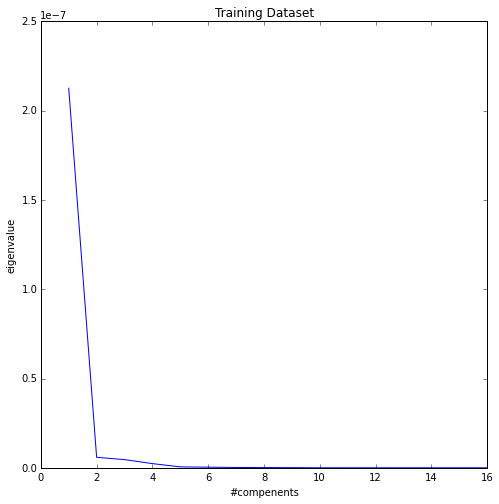

Please input # of components you want to keep for dataset_training: 3
Please input # of components you want to keep for testing dataset (same as training dataset): 3
predict: [1 1 1 ..., 1 1 1]
test_tag: [1 1 1 ..., 1 1 1]
[ True  True  True ...,  True  True  True]
# of right predictions =  3468
# of test samples = 5000
accuracy rate is: 0.6936


In [503]:
## %matplotlib inline

import random
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
from sklearn.decomposition import PCA
from sklearn.svm import SVC


rd_seed_train = 1
rd_seed_test = 10


######## 
# INDEX
########

# Randomly choose 10000 rows of the former 80% of join_r_b_u as Training
def IDX_train(n_train):    
    idx = []
    idx_n = n_train   ###################################################
    idx_span = int(n_join*0.8)
    random.seed(rd_seed_train)
    for i in range(idx_n):
        idx.append(random.randrange(0,idx_span))
    print 'train: idx_n =', idx_n
    print 'train: idx_span is from 0 to '+str(idx_span-1) 
    return idx


# Randomly choose 5000 rows of the later 20% of join_r_b_u as Testing
def IDX_test(n_test):
    idx = []
    idx_n = n_test   ###################################################
    idx_span = int(n_join*0.8)
    random.seed(rd_seed_test)
    for i in range(idx_n):
        idx.append(random.randrange(idx_span,n_join))
    print 'test: idx_n =', idx_n
    print 'test: idx_span is from '+str(idx_span)+' to '+str(n_join-1)
    return idx


n_train = int(raw_input('Please indicate how many samples you want to choose as a training dataset: '))
n_test = int(raw_input('Please indicate how many samples you want to choose as a testing dataset: '))

idx_train = IDX_train(n_train)
idx_test = IDX_test(n_test)



################ 
# NORMALIZATION
################

# comps = list(join_r_b_u.columns.values)
# print comps

def myNORM(tag):   # tag = 'train' or 'test' or 'predict'

    comps = ['lati', 'len_attr', 'longi', 'open_days', 'open_status',
             'star', 'avg_star', 'n_fan', 'n_fri', 'u_r_count',
             'v_c', 'v_f', 'v_u', 'y_elite', 'y_member']
    
    if tag == 'train':
        # normalize the 1st column
        X = join_r_b_u.loc[idx_train,'b_r_count']
        X_n = X / np.linalg.norm(X)
        X_n_df = X_n.to_frame()    
        # normalize the next columns, and then do concatenation
        for i in comps :
            tmp = join_r_b_u.loc[idx_train,i]
            tmp_n = tmp / np.linalg.norm(tmp)
            tmp_n_df = tmp_n.to_frame()
            X_n_df = pd.concat([X_n_df, tmp_n_df], axis=1)
        return X_n_df
    
    elif tag == 'test':
        # normalize the 1st column
        X = join_r_b_u.loc[idx_test,'b_r_count']
        X_n = X / np.linalg.norm(X)
        X_n_df = X_n.to_frame()    
        # normalize the next columns, and then do concatenation
        for i in comps:
            tmp = join_r_b_u.loc[idx_test,i]
            tmp_n = tmp / np.linalg.norm(tmp)
            tmp_n_df = tmp_n.to_frame()
            X_n_df = pd.concat([X_n_df, tmp_n_df], axis=1)
        return X_n_df
    
    else:
        print 'No tag info, train or test?'
        return None



###### 
# PCA
######    

def myPCA_train():

    # apply PCA to the normalized dataset
    pca = PCA(n_components=16, whiten=True)   # whiten=True: to ensure uncorrelated outputs, for SVM
    newX = pca.fit_transform(myNORM('train'))
    covar = pca.get_covariance()
    eigv = LA.eigvals(covar)
    print 'During the PCA process, the eigenvalue is:\n'
    print eigv 
    ratio = pca.explained_variance_ratio_
    score = pca.score(myNORM('train'))
    
    # plot the figure of eigvalue
    plt.figure(figsize=(8,8))    
    xaxis = np.arange(1,17)
    yaxis = eigv.tolist()
    plt.plot(xaxis, yaxis, 'b')
    plt.xlabel('#compenents')
    plt.ylabel('eigenvalue')
    plt.title('Training Dataset')
    plt.show()
    
    # from the plot of myPCA_train(state) to decide how many components should be keeped
    n = raw_input('Please input # of components you want to keep for dataset_training: ')
    pca = PCA(n_components=int(n), whiten=True)   # whiten=True: to ensure uncorrelated outputs, for SVM
    pca_Train = pca.fit_transform(myNORM('train'))
    
    return pca_Train


def myPCA_test():
    # from the plot of myPCA_train(state) to decide how many components should be keeped
    n = raw_input('Please input # of components you want to keep for testing dataset (same as training dataset): ')
    pca = PCA(n_components=int(n), whiten=True)   # whiten=True: to ensure uncorrelated outputs, for SVM
    pca_Test = pca.fit_transform(myNORM('test'))
    return pca_Test


def myPCA_predict():
    # from the plot of myPCA_train(state) to decide how many components should be keeped
    n = raw_input('Please input # of components you want to keep for predicted dataset (same as training dataset): ')
    pca = PCA(n_components=int(n), whiten=True)   # whiten=True: to ensure uncorrelated outputs, for SVM
    pca_Predict = pca.fit_transform(myNORM('predict'))
    return pca_Predict



###### 
# SVM
######    

def mySVM():
    
    j = join_r_b_u 
    
    train_sample = myPCA_train()   # type: array
    b_u_star_train = j.loc[idx_train,'b_u_star']   # type: series
    tmp1 = b_u_star_train.to_frame().as_matrix()   # type: array
    train_tag = []
    for i in range(len(tmp1)):
        if tmp1[i][0] >= 4 :
            train_tag.append(1)
        else:
            train_tag.append(0)
    
    clf = SVC()
    clf.fit(train_sample, np.array(train_tag))
    return clf



######################################
# Accuracy of the NORM-PCA-SVM method 
######################################

clf = mySVM()

test_sample = myPCA_test()
b_u_star_test = join_r_b_u.loc[idx_test,'b_u_star']
tmp2 = b_u_star_test.to_frame().as_matrix()
test_tag = []
for i in range(len(tmp2)):
    if tmp2[i][0] >= 4 :
        test_tag.append(1)
    else:
        test_tag.append(0)

predict = clf.predict(test_sample)
print 'predict:', predict
print 'test_tag:', np.array(test_tag)

rst = (predict == np.array(test_tag))
print rst
print '# of right predictions = ', sum(rst)
print '# of test samples =', len(predict)
print 'accuracy rate is:', sum(rst)/float(len(predict)) 


In [552]:
# Create dataset that needs to be predicted. (It takes quite a while, plz be patient!)
idx_b_u = []
for i in range(400):
    idx_u = random.randrange(0,366715)
    v_u = u_df[idx_u:(idx_u+1)]['u_id'].tolist()[0]
    tmp = r_df[ r_df['u_id']==v_u ]['b_id'].tolist()   # for every u_id, find all b_id that have been stared
    
    # for every u_id find 5 b_id that haven't been stared
    cpt = 0
    while cpt < 5 :         
        idx_b = random.randrange(0,21892)
        v_b = b_df[idx_b:(idx_b+1)]['b_id'].tolist()[0]
        if v_b not in v_u :
            cpt += 1
            
            tmp_b = b_df[idx_b:(idx_b+1)]
            b = tmp_b.to_dict('list')
            tmp_u = u_df[idx_u:(idx_u+1)]
            u = tmp_u.to_dict('list')
            test1 = dict(b, **u)
            idx_b_u.append(test1)
            
idx_b_u
p_sample = pd.DataFrame.from_dict(idx_b_u[0])
for i in range(1,len(idx_b_u)):
    new = pd.DataFrame.from_dict(idx_b_u[i])
    p_sample = pd.concat([p_sample,new])

print len(p_sample)
p_sample

2000


,avg_star,b_id,b_r_count,full_addr,lati,len_attr,longi,n_fan,n_fri,open_days,open_status,star,state,u_id,u_r_count,v_c,v_f,v_u,y_elite,y_member
0,4.53,Q3I0M5GsLn0EiNRL8lI8_Q,4,"350 Place Royale\nMontreal, QC H2Y 3Y5",45.502568,8,-73.554059,0,0,7,1,4.0,QC,5ys9InnQxlDzVF1mFMAnwA,14,1,0,1,0,1.083333
0,4.53,3DMvGD8ZmlMQmhwV66hdSA,63,"2710 E Indian School Rd\nPhoenix, AZ 85016",33.495342,19,-112.022972,0,0,7,1,4.0,AZ,5ys9InnQxlDzVF1mFMAnwA,14,1,0,1,0,1.083333
0,4.53,9D0muUbQVMrw3_eDg3tkFg,7,"304 Butler St\nEtna\nPittsburgh, PA 15223",40.495304,18,-79.945110,0,0,7,1,5.0,PA,5ys9InnQxlDzVF1mFMAnwA,14,1,0,1,0,1.083333
0,4.53,YTPD42EQMCemPmFFR3i_wg,47,"8318 Pineville-Matthews Rd\nCharlotte, NC 28226",35.089829,18,-80.858629,0,0,7,1,4.0,NC,5ys9InnQxlDzVF1mFMAnwA,14,1,0,1,0,1.083333
0,4.53,mu4ic-p0iXBT5Gf2RnuLXg,43,"20905 E Ocotillo Rd\nQueen Creek, AZ 85142",33.248586,20,-111.629952,0,0,7,1,4.5,AZ,5ys9InnQxlDzVF1mFMAnwA,14,1,0,1,0,1.083333
0,3.89,DoEMzev54WS8_lVLJ3NoqQ,258,Palms Casino Resort\n4321 W Flamingo Rd\nLas V...,36.114685,23,-115.194960,1,5,7,1,4.0,NV,YC8Lp5Luwy83QGBjkW7gpA,34,6,7,23,0,2.583333
0,3.89,-pJVjm0t4F6sNHo77HlQKA,39,"5070 S Gilbert Rd\nSte 400\nChandler, AZ 85249",33.233890,26,-111.789496,1,5,7,0,4.0,AZ,YC8Lp5Luwy83QGBjkW7gpA,34,6,7,23,0,2.583333
0,3.89,uB_d4EZ6Jv1smugIhlIYhw,4,"2601 W Dunlap Avenue\nSuite 1\nPhoenix, AZ 85021",33.567221,8,-112.115581,1,5,0,1,2.5,AZ,YC8Lp5Luwy83QGBjkW7gpA,34,6,7,23,0,2.583333
0,3.89,XAtra6d8bcQDXqDKZKiG9Q,3,"142 West Bridge St\nHomestead\nHomestead, PA 1...",40.406831,3,-79.916969,1,5,0,0,3.0,PA,YC8Lp5Luwy83QGBjkW7gpA,34,6,7,23,0,2.583333
0,3.89,O-Xa9GCFWI65YiBD5Jw_hA,508,"6991 E Camelback Rd\nScottsdale, AZ 85251",33.501869,24,-111.931921,1,5,7,1,4.5,AZ,YC8Lp5Luwy83QGBjkW7gpA,34,6,7,23,0,2.583333


During the PCA process, the eigenvalue is:

[  2.12595499e-07   5.88429707e-09   4.57616337e-09   2.34798454e-09
   5.19363086e-10   3.36130028e-10   1.85557170e-10   1.24692253e-10
   8.32556412e-11   6.92101218e-12   5.38557393e-12   4.65618342e-12
   2.76021870e-12   1.99032141e-12   7.41405620e-14   1.97274524e-13]


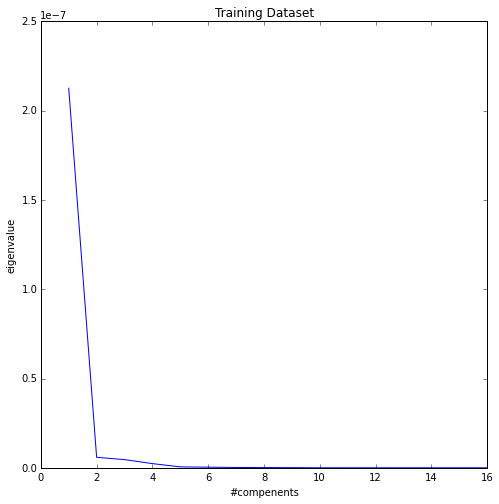

Please input # of components you want to keep for dataset_training: 3
Please input # of components you want to keep for predicted dataset (same as training dataset): 3
2000


,b_id,full_addr,recommend_rst,state,u_id
0,Q3I0M5GsLn0EiNRL8lI8_Q,"350 Place Royale\nMontreal, QC H2Y 3Y5",1,QC,5ys9InnQxlDzVF1mFMAnwA
0,3DMvGD8ZmlMQmhwV66hdSA,"2710 E Indian School Rd\nPhoenix, AZ 85016",1,AZ,5ys9InnQxlDzVF1mFMAnwA
0,9D0muUbQVMrw3_eDg3tkFg,"304 Butler St\nEtna\nPittsburgh, PA 15223",1,PA,5ys9InnQxlDzVF1mFMAnwA
0,YTPD42EQMCemPmFFR3i_wg,"8318 Pineville-Matthews Rd\nCharlotte, NC 28226",1,NC,5ys9InnQxlDzVF1mFMAnwA
0,mu4ic-p0iXBT5Gf2RnuLXg,"20905 E Ocotillo Rd\nQueen Creek, AZ 85142",1,AZ,5ys9InnQxlDzVF1mFMAnwA
0,DoEMzev54WS8_lVLJ3NoqQ,Palms Casino Resort\n4321 W Flamingo Rd\nLas V...,1,NV,YC8Lp5Luwy83QGBjkW7gpA
0,-pJVjm0t4F6sNHo77HlQKA,"5070 S Gilbert Rd\nSte 400\nChandler, AZ 85249",1,AZ,YC8Lp5Luwy83QGBjkW7gpA
0,uB_d4EZ6Jv1smugIhlIYhw,"2601 W Dunlap Avenue\nSuite 1\nPhoenix, AZ 85021",1,AZ,YC8Lp5Luwy83QGBjkW7gpA
0,XAtra6d8bcQDXqDKZKiG9Q,"142 West Bridge St\nHomestead\nHomestead, PA 1...",1,PA,YC8Lp5Luwy83QGBjkW7gpA
0,O-Xa9GCFWI65YiBD5Jw_hA,"6991 E Camelback Rd\nScottsdale, AZ 85251",1,AZ,YC8Lp5Luwy83QGBjkW7gpA


In [560]:

#############
# Prediction 
#############



comps = ['lati', 'len_attr', 'longi', 'open_days', 'open_status',
         'star', 'avg_star', 'n_fan', 'n_fri', 'u_r_count',
         'v_c', 'v_f', 'v_u', 'y_elite', 'y_member']

# normalize the 1st column
X = p_sample['b_r_count']            ###############################
X_n = X / np.linalg.norm(X)
X_n_df = X_n.to_frame()    
# normalize the next columns, and then do concatenation
for i in comps:
    tmp = p_sample[i]
    tmp_n = tmp / np.linalg.norm(tmp)
    tmp_n_df = tmp_n.to_frame()
    X_n_df = pd.concat([X_n_df, tmp_n_df], axis=1)
#X_n_df

clf = mySVM()

n = raw_input('Please input # of components you want to keep for predicted dataset (same as training dataset): ')
pca = PCA(n_components=int(n), whiten=True)   # whiten=True: to ensure uncorrelated outputs, for SVM
pca_Predict = pca.fit_transform(X_n_df)

final = clf.predict(pca_Predict)
#print 'predict:', final
#print len(final)

s = pd.Series(final)

final_tag = []
for i in range(len(p_sample)):
    p = p_sample[i:(i+1)][['b_id','u_id','state','full_addr']].to_dict('list')
    tag = final[i]
    rst = {'recommend_rst':tag}
    test = dict(p, **rst)
    final_tag.append(test)

final_tag
f_tag_df = pd.DataFrame.from_dict(final_tag[0])
for i in range(1,len(final_tag)):
    new = pd.DataFrame.from_dict(final_tag[i])
    f_tag_df = pd.concat([f_tag_df,new])


# Final recommendation tag (1-recommend; 0-nonrecommend)
print len(f_tag_df)
f_tag_df.head(10)


*------------------------

#Bonus Question: Display results or implement a prototype service using a web framework (20 points)